<a href="https://colab.research.google.com/github/m-santh/AicoreKaggle/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
(10000, 100)
(10000,)
(40000, 100)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.42      0.48      0.45       244
           1       0.42      0.47      0.44       254
           2       0.31      0.32      0.31       245
           3       0.23      0.20      0.22       240
           4       0.30      0.33      0.32       230
           5       0.39      0.34      0.36       253
           6       0.42      0.41      0.41       261
           7       0.51      0.36      0.42       261
           8       0.55      0.55      0.55       268
           9       0.35      0.41      0.38       244

    accuracy                           0.39      2500
   macro avg       0.39      0.39      0.39      2500
weighted avg       0.39      0.39      0.39      2500



NameError: ignored

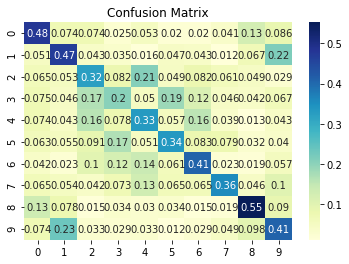

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

import os
#os.chdir("../../Kaggle/")

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

data_X = np.load('/content/drive/MyDrive/AiCore/X_train.npy')
data_Y = np.load('/content/drive/MyDrive/AiCore/y_train.npy')
data_Y = data_Y.astype(int) 
test_data = np.load('/content/drive/MyDrive/AiCore/X_test.npy')

unique, counts = np.unique(data_Y, return_counts=True)
print(dict(zip(unique, counts)))

scaler = MinMaxScaler()
#scaler = StandardScaler()

data_X = scaler.fit_transform(data_X)
test_data = scaler.transform(test_data)
#X_test = scaler.transform(X_test)

labels = set(data_Y)

print(np.shape(data_X))

print(np.shape(data_Y))

print(np.shape(test_data))

#visual method to qualitatively evaluate each model via visual inspection
def format_prediction(predicted_outputs):
  predicted_image_array = np.zeros_like(image_array)
  i = 0
  for row,pixels in enumerate(predicted_image_array):
    for column in range(len(pixels)):
      p = np.argmax(predicted_outputs[i])
      predicted_image_array[row][column] = [WHITE,RED,BLUE][p]
      i += 1
  return predicted_image_array

#also use metrics (Precision, Recall, F1, Confusion Matrix) to quantitatively evaluate each model
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(y,y_hat,labels):
  print(classification_report(y,y_hat))
  cm = confusion_matrix(y,y_hat)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmat = pd.DataFrame(cm)
  cmat.columns = labels
  #cmat.set_index([pd.Index(labels, ' ')],inplace=True)
  sns.heatmap(cmat,cmap="YlGnBu", annot=True)
  plt.title("Confusion Matrix")

X_train, X_val, y_train, y_val = train_test_split(data_X, data_Y, random_state = 37)

# training a linear SVM classifier 
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion="entropy", max_features=None, verbose=True, random_state=0, class_weight="balanced")
rf_classifier.fit(X_train, y_train)

y_hat_val = rf_classifier.predict(X_val)
y_hat_val_labels = [np.argmax(p) for p in y_hat_val]
evaluate(y_val, y_hat_val, labels)
Image.fromarray(format_prediction(y_hat_val))

#svm_model_linear = SVC(kernel = 'rbf', C = 1e-1, verbose=True, probability=True, random_state=0, class_weight="balanced", gamma="auto").fit(X_train, y_train) 
#svm_model_linear = LinearSVC(random_state=0, tol=1e-6, class_weight="balanced", verbose=1, C=10, max_iter=10000).fit(X_train, y_train) 
#svm_predictions = svm_model_linear.predict(X_val) 

#svm_model_linear = SVC(kernel = 'rbf', C = 1, verbose=True, probability=True, random_state=0, class_weight="balanced").fit(data_X, data_Y) 
#y_test = svm_model_linear.predict(test_data) 

from sklearn.neural_network import MLPClassifier
#dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
#dnn_classifier.fit(X_train, y_train)
#dnn_predictions = dnn_classifier.predict(X_val)

from sklearn.multiclass import OneVsRestClassifier
#svm_model_linear = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*15))
#svm_model_linear.fit(np.array(X_train), y_train)
#svm_predictions = svm_model_linear.predict(X_val)

#pd.DataFrame({"Id": np.arange(len(y_test)), "Category": y_test}).astype(int).to_csv(
#    "solution.csv", index=False
#)

svm_predictions = y_hat_val
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_val, svm_predictions) 

print(accuracy)
# creating a confusion matrix 
cm = confusion_matrix(y_val, svm_predictions) 

print(cm)